In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rc('text', usetex=True)

# Read Noise2Seg Results

In [2]:
def get_measure(pre, exp, run=1, fraction=0.5, measure='SEG', score_type='validation_'):
    with open('/home/tibuch/Noise2Seg/experiments/{}_{}_run{}/fraction_{}/{}scores.csv'.format(pre, exp, run, fraction, score_type)) as f:
        line = f.readline()
        while line:
            line = line.strip().split(',')
            if line[0] == measure:
                return float(line[1])
            line = f.readline()
    return None

In [3]:
def read_Noise2Seg_results(pre, exp, measure='SEG', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='validation_'):
    
    stats = []
    
    for frac in fractions:
        scores = []
        for r in runs:
            scores.append(get_measure(pre, exp, run=r, fraction=frac, measure=measure, score_type=score_type))
        
        scores = np.array(scores)
        stats.append([frac, np.mean(scores), np.std(scores)/np.sqrt(scores.shape[0])])
    
    return np.array(stats)

In [4]:
def read_Noise2Seg_bestAlpha_results(pre, exp, measure='SEG', runs=[1,2,3,4,5],
                                     fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], 
                                     alphas=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    stats = []
    best_alphas = []
    for frac in fractions:
        scores = []
        best_alphas_fraction = []
        for r in runs:
            best_score = 0
            best_alpha = 0
            for alpha in alphas:
                score = get_measure(pre + str(alpha), exp, run=r, fraction=frac, measure=measure, score_type="")
                if score > best_score:
                    path = pre+str(alpha)+'_'+exp+'_run'+str(r)
                    best_score = score
                    best_alpha = alpha
            
            # read best score from test-data with this best_alpha
            best_alphas_fraction.append(best_alpha)
            scores.append(get_measure(pre + str(best_alpha), exp, run=r, fraction=frac, measure=measure, score_type=""))
        best_alphas.append(best_alphas_fraction)    
            
        scores = np.array(scores)
        stats.append([frac, np.mean(scores), np.std(scores)/np.sqrt(scores.shape[0])])
        
    return np.array(stats), np.array(best_alphas)

# Fraction to #Images

In [5]:
def fraction_to_abs(fracs, max_num_imgs=3800):
    return np.round(max_num_imgs*fracs/100)

In [6]:
fraction_to_abs(8)

304.0

# DSB2018 n10: SEG scores on validation data

In [7]:
baseline_dsb_n0 = read_Noise2Seg_results('fin', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')
baseline_dsb_n10 = read_Noise2Seg_results('fin', 'dsb_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')
baseline_dsb_n20 = read_Noise2Seg_results('fin', 'dsb_n20', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

In [8]:
joint_alpha0_5_dsb_n0 = read_Noise2Seg_results('alpha0.5', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='')

In [9]:
joint_alpha0_5_dsb_n10 = read_Noise2Seg_results('alpha0.5', 'dsb_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='')

In [10]:
joint_alpha0_5_dsb_n20 = read_Noise2Seg_results('alpha0.5', 'dsb_n20', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='')

In [11]:
bestAlpha_n0, bestAlpha_n0_alphas = read_Noise2Seg_bestAlpha_results('alpha', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0],
                           alphas=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
bestAlpha_n10, bestAlpha_n10_alphas = read_Noise2Seg_bestAlpha_results('alpha', 'dsb_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0],
                           alphas=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
bestAlpha_n20, bestAlpha_n20_alphas = read_Noise2Seg_bestAlpha_results('alpha', 'dsb_n20', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0],
                           alphas=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [12]:
joint_alpha0_3_dsb_n0 = read_Noise2Seg_results('alpha0.3', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='')
joint_alpha0_3_dsb_n10 = read_Noise2Seg_results('alpha0.3', 'dsb_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='')
joint_alpha0_3_dsb_n20 = read_Noise2Seg_results('alpha0.3', 'dsb_n20', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='')

In [13]:
joint_alpha0_7_dsb_n0 = read_Noise2Seg_results('alpha0.7', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='')
joint_alpha0_7_dsb_n10 = read_Noise2Seg_results('alpha0.7', 'dsb_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='')
joint_alpha0_7_dsb_n20 = read_Noise2Seg_results('alpha0.7', 'dsb_n20', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='')

# Load Noise Helps Data

In [14]:
baseline_dsb_n0 = read_Noise2Seg_results('fin', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

baseline_flywing_n0 = read_Noise2Seg_results('fin', 'flywing_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.125, 0.25, 0.5, 1.0, 2.0], score_type = '')

baseline_mouse_n0 = read_Noise2Seg_results('finSeq', 'nmouse_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.125, 0.25, 0.5, 1.0, 2.0], score_type = '')

sequential_dsb_n0 = read_Noise2Seg_results('finSeq', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

sequential_flywing_n0 = read_Noise2Seg_results('finSeq', 'flywing_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.125, 0.25, 0.5, 1.0, 2.0], score_type = '')

sequential_mouse_n0 = read_Noise2Seg_results('fin', 'nmouse_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.125, 0.25, 0.5, 1.0, 2.0], score_type = '')

joint_alpha0_5_dsb_n0 = read_Noise2Seg_results('alpha0.5', 'dsb_n0', measure='AP', runs=[1,2,3,4,5],
                                             fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

joint_alpha0_5_dsb_n10 = read_Noise2Seg_results('alpha0.5', 'dsb_n10', measure='AP', runs=[1,2,3,4,5],
                                             fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

joint_alpha0_5_dsb_n20 = read_Noise2Seg_results('alpha0.5', 'dsb_n20', measure='AP', runs=[1,2,3,4,5],
                                             fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

joint_alpha0_5_flywing_n0 = read_Noise2Seg_results('alpha0.5', 'flywing_n0', measure='AP', runs=[1,2,3,4,5],
                                             fractions=[0.125, 0.25, 0.5, 1.0, 2.0], score_type = '')

joint_alpha0_5_flywing_n10 = read_Noise2Seg_results('alpha0.5', 'flywing_n10', measure='AP', runs=[1,2,3,4,5],
                                             fractions=[0.125, 0.25, 0.5, 1.0, 2.0], score_type = '')

joint_alpha0_5_flywing_n20 = read_Noise2Seg_results('alpha0.5', 'flywing_n20', measure='AP', runs=[1,2,3,4,5],
                                             fractions=[0.125, 0.25, 0.5, 1.0, 2.0], score_type = '')

joint_alpha0_5_mouse_n0 = read_Noise2Seg_results('alpha0.5', 'nmouse_n0', measure='AP', runs=[1,2,3,4,5],
                                             fractions=[0.125, 0.25, 0.5, 1.0, 2.0], score_type = '')

joint_alpha0_5_mouse_n10 = read_Noise2Seg_results('alpha0.5', 'nmouse_n10', measure='AP', runs=[1,2,3,4,5],
                                             fractions=[0.125, 0.25, 0.5, 1.0, 2.0], score_type = '')

joint_alpha0_5_mouse_n20 = read_Noise2Seg_results('alpha0.5', 'nmouse_n20', measure='AP', runs=[1,2,3,4,5],
                                             fractions=[0.125, 0.25, 0.5, 1.0, 2.0], score_type = '')

In [15]:
def cm2inch(*tupl, scale=3):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(scale * i/inch for i in tupl[0])
    else:
        return tuple(scale * i/inch for i in tupl)

In [16]:
plt.rc('font', family = 'serif', size = 16)

In [17]:
def plot_mfill(data, color, alpha, m, max_imgs=3800, label=''):
    plt.fill_between(fraction_to_abs(data[:,0], max_num_imgs=max_imgs),
                    y1 = data[:,1] - m + data[:,2],
                    y2 = data[:,1] - m - data[:,2], color=color, alpha=alpha)
    plt.plot(fraction_to_abs(data[:,0], max_num_imgs=max_imgs),
            data[:,1] - m, color=color, label=label)


In [18]:
def plot_alpha_delta(baseline, joint_alpha05, best_alpha, joint_alpha03, joint_alpha07, title):
    
    plot_mfill(best_alpha, color='#FE8C77', alpha=0.25, m=joint_alpha05[:,1], label=r'Best $\alpha$')
    plot_mfill(joint_alpha07, color='#DB81A4', alpha=0.25, m=joint_alpha05[:,1], label=r'$\alpha = 0.7$')
    plot_mfill(joint_alpha05, color='#8F89B4', alpha=0.55, m=joint_alpha05[:,1], label=r'$\alpha = 0.5$')
    plot_mfill(joint_alpha03, color='#3C8A9A', alpha=0.25, m=joint_alpha05[:,1], label=r'$\alpha = 0.3$')
    plot_mfill(baseline, color='#6D3B2B', alpha=0.25, m=joint_alpha05[:,1], label=r'Baseline')

    plt.semilogx()

    plt.ylabel(r'\textbf{$\Delta$ AP ($\alpha=0.5$)}')

    plt.grid(axis='y')

    plt.xticks(ticks=fraction_to_abs(baseline[:, 0], max_num_imgs = 3800), 
               labels=fraction_to_abs(baseline[:, 0], max_num_imgs = 3800).astype(np.int),
               rotation=45)
    plt.minorticks_off()

    plt.yticks(rotation=45)

    plt.xlim([8.5, 4500])
    plt.ylim([-0.15, 0.065])

    plt.title(title)

In [23]:
def plot_noise_helps(baseline, n0, n10, n20, title, xlim, max_imgs):
    plt.plot(fraction_to_abs(baseline[:, 0], max_num_imgs = max_imgs), 
         baseline[:, 1],
         color = '#6D3B2B', alpha = 1, label = r'Baseline, n0', linewidth=2)
    plt.fill_between(fraction_to_abs(baseline[:, 0], max_num_imgs = max_imgs), 
                     y1 = baseline[:, 1] + baseline[:, 2], 
                     y2 = baseline[:, 1] - baseline[:, 2], 
                     color = '#6D3B2B', alpha = 0.25)

    plt.plot(fraction_to_abs(n0[:, 0], max_num_imgs = max_imgs), 
             n0[:, 1],
             color = '#8F89B4', alpha = 0.25, label = r'$\alpha = 0.5$, n0', linewidth=2)
    plt.fill_between(fraction_to_abs(n0[:, 0], max_num_imgs = max_imgs), 
                     y1 = n0[:, 1] + n0[:, 2], 
                     y2 = n0[:, 1] - n0[:, 2], 
                     color = '#8F89B4', alpha = 0.25)


    plt.plot(fraction_to_abs(n10[:, 0], max_num_imgs = max_imgs), 
             n10[:, 1],
             color = '#8F89B4', alpha = 0.35, label = r'$\alpha = 0.5$, n10', linewidth=2)
    plt.fill_between(fraction_to_abs(n10[:, 0], max_num_imgs = max_imgs), 
                     y1 = n10[:, 1] + n10[:, 2], 
                     y2 = n10[:, 1] - n10[:, 2], 
                     color = '#8F89B4', alpha = 0.35)


    plt.plot(fraction_to_abs(n20[:, 0], max_num_imgs = max_imgs), 
             n20[:, 1],
             color = '#8F89B4', alpha = 0.50, label = r'$\alpha = 0.5$, n20', linewidth=2)
    plt.fill_between(fraction_to_abs(n20[:, 0], max_num_imgs = max_imgs), 
                     y1 = n20[:, 1] + n20[:, 2], 
                     y2 = n20[:, 1] - n20[:, 2], 
                     color = '#8F89B4', alpha = 0.50)

    plt.semilogx()

    plt.ylabel(r'\textbf{AP}')

    plt.grid(axis='y')

    plt.xticks(ticks=fraction_to_abs(baseline[:, 0], max_num_imgs = max_imgs), 
               labels=fraction_to_abs(baseline[:, 0], max_num_imgs = max_imgs).astype(np.int),
               rotation=45)
    plt.minorticks_off()

    plt.yticks(rotation=45)

    if xlim:
        plt.xlim(xlim)

    plt.title(title)

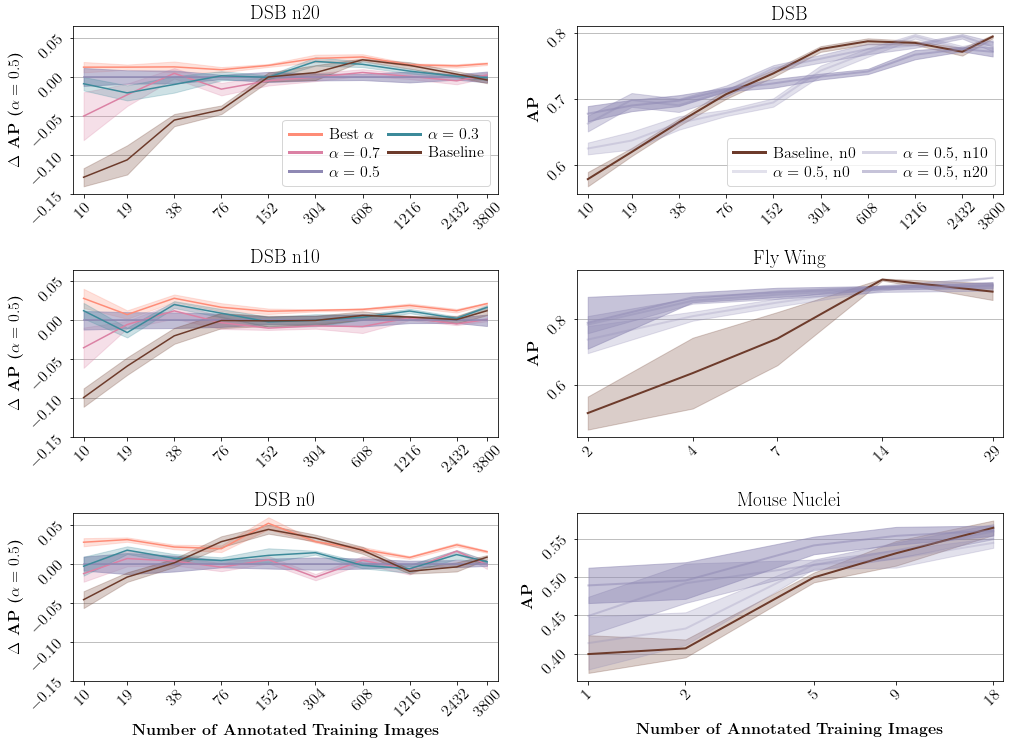

In [24]:
fig = plt.figure(figsize=cm2inch(12.2,9)) # 12.2cm is the text-widht of the MICCAI template
plt.rcParams['axes.axisbelow'] = True

plt.subplot(3,2,1)
plot_alpha_delta(baseline_dsb_n20, joint_alpha0_5_dsb_n20, bestAlpha_n20, joint_alpha0_3_dsb_n20,
                 joint_alpha0_7_dsb_n20, 'DSB n20')
leg = plt.legend(loc = 'lower right', ncol=2, labelspacing=0.1, handletextpad=0.5, columnspacing=0.5)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)


plt.subplot(3,2,3)
plot_alpha_delta(baseline_dsb_n10, joint_alpha0_5_dsb_n10, bestAlpha_n10, joint_alpha0_3_dsb_n10,
                 joint_alpha0_7_dsb_n10, 'DSB n10')


plt.subplot(3,2,5)
plot_alpha_delta(baseline_dsb_n0, joint_alpha0_5_dsb_n0, bestAlpha_n0, joint_alpha0_3_dsb_n0,
                 joint_alpha0_7_dsb_n0, 'DSB n0')
plt.xlabel(r'\textbf{Number of Annotated Training Images}')

plt.subplot(3,2,2)
plot_noise_helps(baseline_dsb_n0, joint_alpha0_5_dsb_n0, joint_alpha0_5_dsb_n10, joint_alpha0_5_dsb_n20,
                'DSB', [8.5, 4400], 3800)
leg = plt.legend(loc = 'lower right', ncol=2, labelspacing=0.1, handletextpad=0.5, columnspacing=0.5)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)


plt.subplot(3,2,4)
plot_noise_helps(baseline_flywing_n0, joint_alpha0_5_flywing_n0, joint_alpha0_5_flywing_n10, joint_alpha0_5_flywing_n20,
                'Fly Wing', [1.86, 31], 1428)


plt.subplot(3,2,6)
plot_noise_helps(baseline_mouse_n0, joint_alpha0_5_mouse_n0, joint_alpha0_5_mouse_n10, joint_alpha0_5_mouse_n20,
                'Mouse Nuclei', [0.92, 19.25], 908)
plt.xlabel(r'\textbf{Number of Annotated Training Images}', labelpad=14)

plt.tight_layout();

plt.savefig('alpha_delta_and_additional_noise.pdf', pad_inches=0.0);
plt.savefig('alpha_delta_and_additional_noise.svg', pad_inches=0.0)